# Exploratory data analysis
---

Dataset:

https://www.kaggle.com/datasets/darpan25bajaj/retail-case-study-data?select=Customer.csv

In [4]:
# Import necessary libraries

import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy

df_customer = pd.read_csv("..\\data\\Customer.csv")
df_prod_cat_info = pd.read_csv("..\\data\\prod_cat_info.csv")
df_transactions = pd.read_csv("..\\data\\Transactions.csv")

# Customer Dataframe

In [3]:
df_customer.shape

(5647, 4)

In [4]:
df_customer.head(5)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [39]:
# Change type of DOB to datetime

df_customer['DOB'] = pd.to_datetime(df_customer['DOB'], format="%d-%m-%Y")
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   int64         
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5645 non-null   object        
 3   city_code    5645 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 176.6+ KB


In [7]:
# Search for null values

df_customer.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [8]:
# Rows with null values

df_customer[df_customer.isna().any(axis=1)]

,customer_Id,DOB,Gender,city_code
24,267199,1970-02-14,NaN,2.0
87,271626,1970-06-02,NaN,6.0
115,268447,1970-07-14,M,NaN
149,268709,1970-09-09,F,NaN


In [40]:
# Fill null values 

df_customer.fillna(method="ffill", inplace= True)
df_customer.isnull().sum()

customer_Id    0
DOB            0
Gender         0
city_code      0
dtype: int64

In [10]:
df_customer.duplicated().sum()

0

## Products-category-info Dataframe

In [11]:
df_prod_cat_info.shape

(23, 4)

In [12]:
df_prod_cat_info

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [13]:
df_prod_cat_info.isnull().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [14]:
df_prod_cat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


# Transactions Dataframe

In [15]:
df_transactions.shape

(23053, 10)

In [16]:
df_transactions.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [17]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [18]:
# The column is renamed to be able to merge it with the custom dataframe

df_prod_cat_info.rename(columns = {"prod_sub_cat_code":"prod_subcat_code"},inplace = True)

In [45]:
# Change type of tran_date column to datetime

# The date is normalized to a single format. ("d/m/Y") -> ("d-m-Y")
df_transactions["tran_date"] = df_transactions["tran_date"].replace("/", "-", regex=True)
df_transactions[df_transactions['tran_date'].str.contains(r"-")]

# Change type of tran_date to datetime
df_transactions['tran_date'] = pd.to_datetime(df_transactions['tran_date'], format="%d-%m-%Y")

df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 1.8+ MB


In [20]:
df_transactions.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [21]:
df_transactions.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


# Brief display of data from the dataframes

## Customer Dataframe:

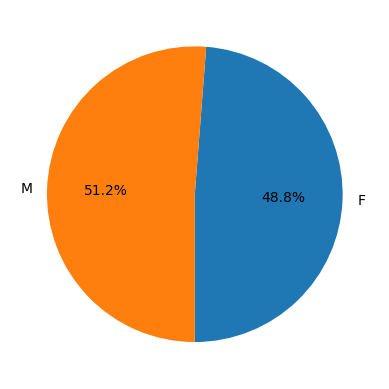

In [22]:
# Genders

df_gender = df_customer.groupby(by="Gender").size()
plt.pie(df_gender, labels= df_gender.index, autopct='%1.1f%%', startangle=270)
plt.show()

In [41]:
# add Age column

today = date.today()
s_age = df_customer['DOB'].apply(lambda x: today.year - x.year - ( (today.month,today.day) < (x.month,x.day)  ))
df_customer.insert(2,"Age",s_age)

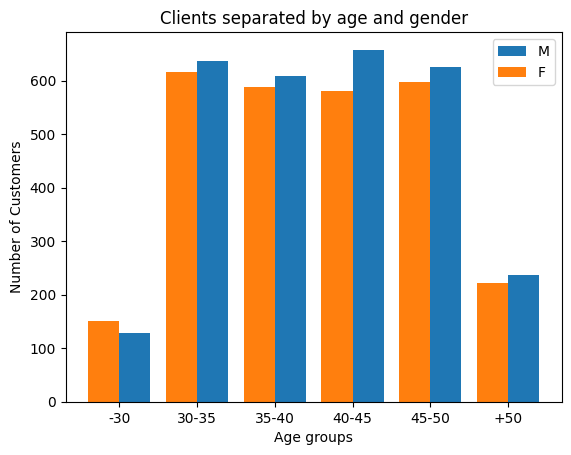

In [42]:
# Ages are grouped to improve visualization

labels = ["-30","30-35","35-40","40-45","45-50","+50"]
bins = [0,30,35,40,45,50,100]

f_ages=pd.cut(x=df_customer['Age'].where(df_customer['Gender'] == "F"), bins= bins, labels= labels)
m_ages=pd.cut(x=df_customer['Age'].where(df_customer['Gender'] == "M"), bins= bins, labels= labels)


# Shows the ages of the clients grouped by gender
X_axis = numpy.arange(len(labels))
  
plt.bar(X_axis + 0.2, m_ages.value_counts().sort_index(), 0.4, label = 'M')
plt.bar(X_axis - 0.2, f_ages.value_counts().sort_index(), 0.4, label = 'F')
  
plt.xticks(X_axis, labels)
plt.xlabel("Age groups")
plt.ylabel("Number of Customers")
plt.title("Clients separated by age and gender")
plt.legend()
plt.show()


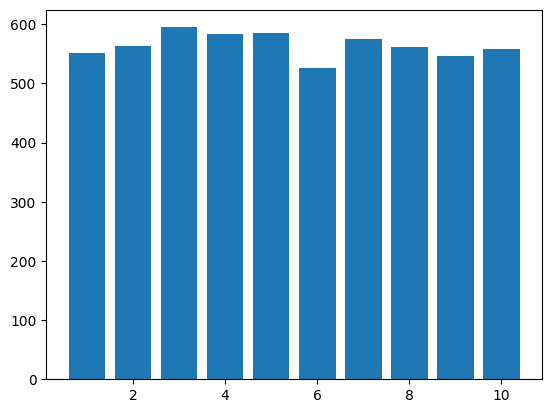

In [31]:
# Cities

cities = df_customer.groupby(by= "city_code").size()

plt.bar(cities.index,cities)
plt.show()

## Transactions:

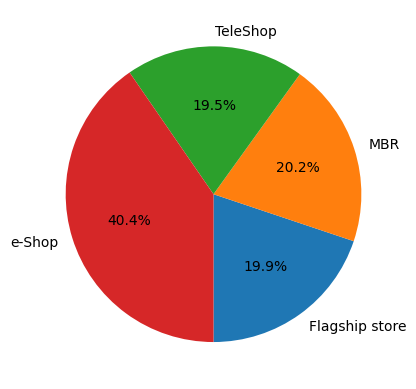

In [43]:
# Share of sales over total transactions

stores = df_transactions.groupby(by= "Store_type").size()

plt.pie(stores, labels= stores.index, autopct='%1.1f%%', startangle=270)
plt.show()

In [46]:
# Transactions per year

# The year column is added to be able to group the dataframe
df_transactions.insert(loc=3, column='year', value= df_transactions.tran_date.dt.year)

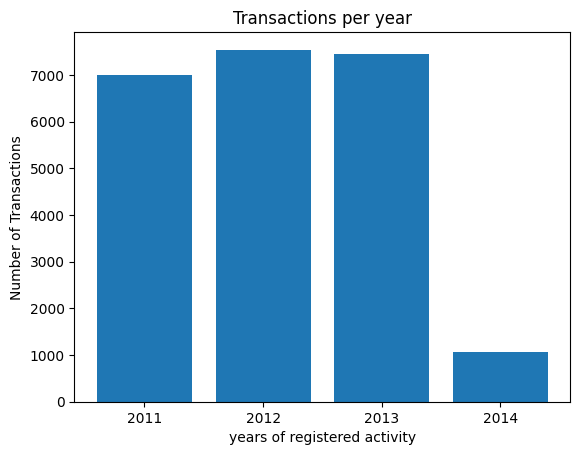

In [51]:
# Show Transactions per year

transactions_p_year = df_transactions.groupby(by=['year'], as_index = False)['total_amt'].count()

recorded_years = ['2011','2012','2013','2014']
X_axis = numpy.arange(len(recorded_years))

plt.xticks(X_axis, recorded_years)
plt.bar(X_axis, transactions_p_year["total_amt"])
plt.xlabel("years of registered activity")
plt.ylabel("Number of Transactions")
plt.title("Transactions per year")
plt.show()